## Boston House - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("C:\\Users\\Arslan Mushtaq\\Desktop\\data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [5]:
housing['CHAS'].value_counts()

0    476
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [7]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'CRIM'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'RM'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'ZN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

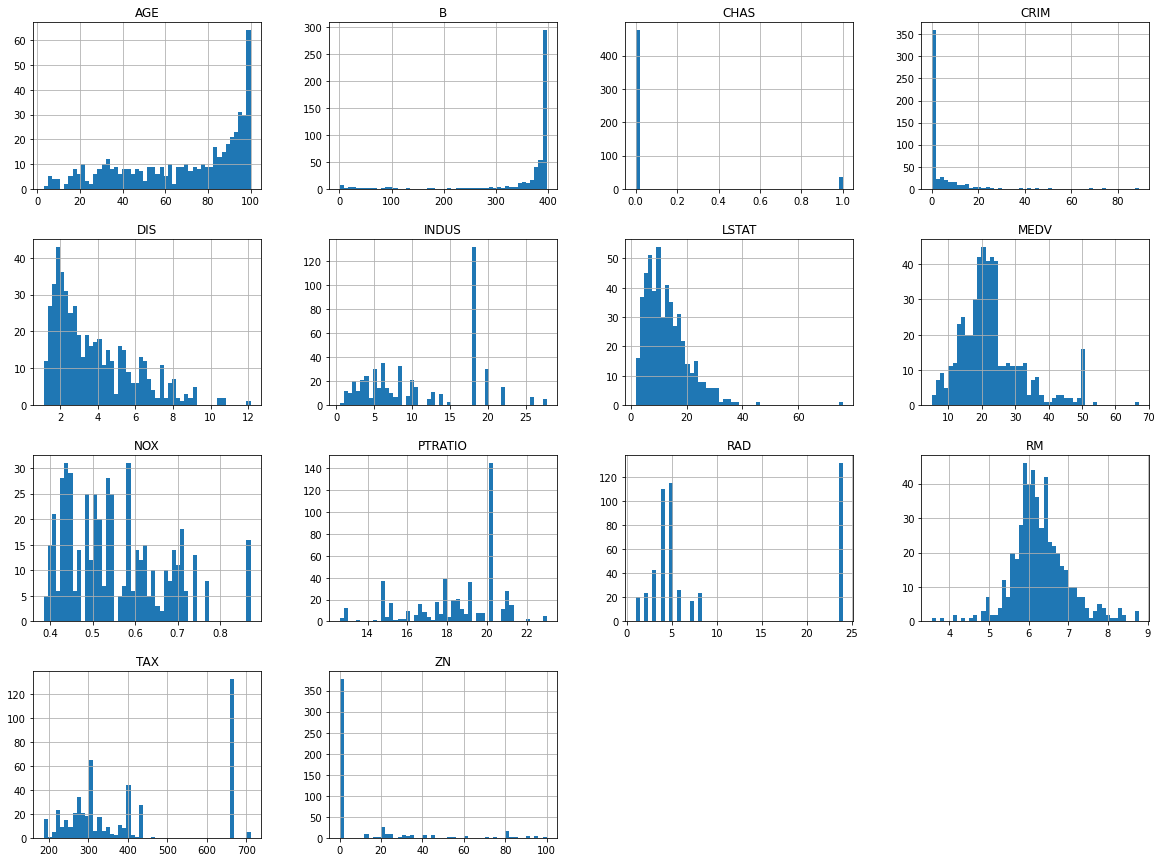

In [8]:
# # For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [9]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

2nd Method for Training And Testing

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 408
Rows in test set: 103



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    96
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    380
1     28
Name: CHAS, dtype: int64

In [16]:
 95/7

13.571428571428571

In [17]:
376/28

13.428571428571429

In [18]:
housing = strat_train_set.copy()

## Looking for Correlations

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.681481
B          0.350283
ZN         0.341767
DIS        0.250670
CHAS       0.191563
AGE       -0.366230
RAD       -0.381955
CRIM      -0.395849
NOX       -0.425104
TAX       -0.467171
PTRATIO   -0.475870
INDUS     -0.481414
LSTAT     -0.720350
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

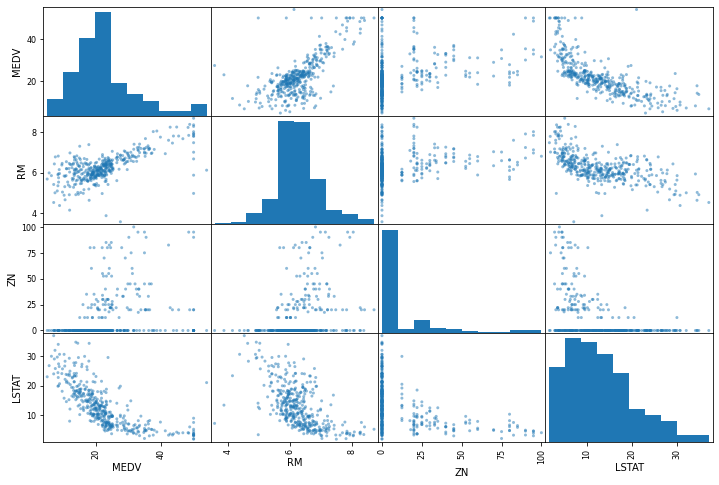

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

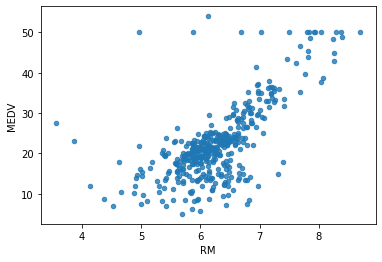

In [21]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations

In [22]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1,68.959436
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,187.026116
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1,38.970588
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9,NaN


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.681481
B          0.350283
ZN         0.341767
DIS        0.250670
CHAS       0.191563
AGE       -0.366230
RAD       -0.381955
CRIM      -0.395849
NOX       -0.425104
TAX       -0.467171
PTRATIO   -0.475870
INDUS     -0.481414
TAXRM     -0.535069
LSTAT     -0.720350
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

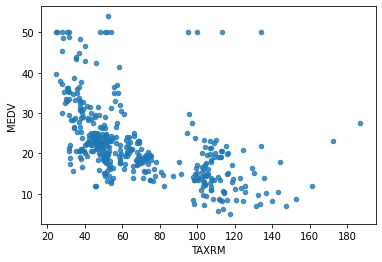

In [25]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [26]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [27]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [28]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(403, 13)

In [29]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(408, 12)

In [30]:
median = housing["RM"].median() # Compute median for Option 3

In [31]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

495    5.670
254    6.108
365    3.561
193    6.800
35     6.208
       ...  
386    4.652
243    6.393
22     6.142
480    6.242
455    6.525
Name: RM, Length: 408, dtype: float64

In [32]:
housing.shape

(408, 13)

In [33]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,408.000000,408.000000,408.00000,408.000000,408.000000,403.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.269007,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.703808,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.876500,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.208000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000
75%,3.716457,12.500000,18.10000,0.000000,0.625750,6.629500,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20800e+00, 7.79500e+01, 3.10730e+00, 5.00000e+00, 3.35000e+02,
       1.90500e+01, 3.90980e+02, 1.17050e+01])

In [36]:
X = imputer.transform(housing)

In [37]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,408.000000,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.268260,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.699504,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.878750,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.208000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000
75%,3.716457,12.500000,18.10000,0.000000,0.625750,6.626000,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape

(408, 13)

## Selecting a desired model for Dragon Real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]

In [44]:
some_labels = housing_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([21.749, 22.381, 25.647, 30.479, 20.227])

In [47]:
list(some_labels)

[23.1, 21.9, 27.5, 31.1, 18.9]

## Evaluating the model

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [49]:
rmse

1.4874308543823558

## Using better evaluation technique - Cross Validation

In [50]:
from sklearn.metrics import r2_score

In [51]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([3.00378445, 3.93729004, 5.10122055, 4.20617159, 3.0242006 ,
       2.18922825, 6.93577849, 2.92493718, 3.36886069, 3.64421746])

In [53]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [54]:
print_scores(rmse_scores)

Scores: [3.00378445 3.93729004 5.10122055 4.20617159 3.0242006  2.18922825
 6.93577849 2.92493718 3.36886069 3.64421746]
Mean:  3.833568930976701
Standard deviation:  1.2847229513852434


## Saving the model

In [55]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [56]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[21.666 27.135 24.245 26.35  33.191 23.388 22.427 20.629 22.806 20.979
 10.852 22.094 27.259 19.748 14.708 18.621 18.812 19.341 18.621 31.45
 25.895 18.695 31.532 15.714 24.71  18.53  14.757 31.182 19.159 20.401
 24.545 19.133 44.946 30.496 21.425 41.643 32.817 22.331 26.763 21.881
 19.607 13.821 22.624 28.647 24.244 11.463  8.936 33.906 43.058 19.414
 23.447 36.597 15.138 25.254 20.17  28.904 19.499 18.767 23.34  20.282
 20.358 32.924 10.939 21.21  22.696 22.043 15.393 20.761 19.409 19.245
 31.685 22.414 29.025 19.748 47.327 15.75  19.788 38.667 45.116 16.7
 24.569 10.422 44.439 20.679 25.296 15.318 37.133 11.802 31.458 20.81
 17.687 43.58  20.989 14.591  7.434 12.718 33.23  29.778 34.033 22.24
 17.707 33.15  19.475] [22.4, 25.0, 22.2, 24.4, 31.5, 23.3, 25.0, 24.5, 22.0, 20.3, 12.3, 21.2, 28.0, 23.8, 14.6, 20.8, 17.2, 19.5, 14.4, 28.5, 30.1, 19.6, 23.6, 19.4, 24.7, 19.9, 13.5, 30.3, 21.8, 20.4, 27.9, 18.9, 46.0, 23.9, 21.7, 44.0, 33.2, 21.6, 27.0, 19.8, 20.9, 16.7, 22.2, 24.8, 28.1, 1

In [57]:
final_rmse

4.795643604619121

In [58]:
prepared_data[0]

array([-0.42152521, -0.48685178, -0.24673925, -0.27144836,  0.2311586 ,
       -0.85631303, -1.42946756, -0.4510327 , -0.42117544, -0.12039257,
        0.3268577 ,  0.41580739,  0.64788652])

## Using the model

In [59]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([23.796])